In [1]:
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 719 kB 8.6 MB/s 
     |████████████████████████████████| 4.4 MB 48.0 MB/s 
     |████████████████████████████████| 1.2 MB 23.9 MB/s 
     |████████████████████████████████| 362 kB 54.8 MB/s 
     |████████████████████████████████| 1.1 MB 53.3 MB/s 
     |████████████████████████████████| 101 kB 12.6 MB/s 
     |████████████████████████████████| 212 kB 61.0 MB/s 
     |████████████████████████████████| 140 kB 52.0 MB/s 
     |████████████████████████████████| 596 kB 49.3 MB/s 
     |████████████████████████████████| 127 kB 48.4 MB/s 
     |████████████████████████████████| 94 kB 3.8 MB/s 
     |████████████████████████████████| 271 kB 55.0 MB/s 
     |████████████████████████████████| 144 kB 54.6 MB/s 
     |████████████████████████████████| 6.6 MB 40.5 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10

In [2]:
from fastbook import *
from fastai.vision.widgets import *

# Mental Health

> [mental health kaggle data](https://www.kaggle.com/datasets/shariful07/student-mental-health)

## Downloads

In [3]:
#hide
! [ -e /content ] && pip install treeinterpreter waterfallcharts opendatasets dtreeviz
! [ -e /content ] && pip install -f https://sklearn-nightly.scdn8.secure.raxcdn.com scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 61 kB 266 kB/s 
  Created wheel for waterfallcharts: filename=waterfallcharts-3.8-py3-none-any.whl size=3413 sha256=cbf6bb111d2f0ec618c58b491b132c3e2f71fea4e0ac2394a89da34f7405dc53
  Stored in directory: /root/.cache/pip/wheels/4a/b2/85/9b6eda27fab2effa580c6942fb094e8536cc46e8741ec5f586
  Created wheel for dtreeviz: filename=dtreeviz-1.3.6-py3-none-any.whl size=67326 sha256=aa22c8bf884f19ecdffc05d055b19629e8127904f0d33346878048620f423d51
  Stored in directory: /root/.cache/pip/wheels/33/76/fe/99227ff871766e7284bb88d3d28e2f4886b8ec04d669033478
Successfully built waterfallcharts dtreeviz
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://sklearn-nightly.scdn8.secure.raxcdn.com


In [4]:
import opendatasets as od
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
from fastai.tabular.all import *
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG
import random
import warnings
warnings.simplefilter('ignore', FutureWarning)

from treeinterpreter import treeinterpreter
from waterfall_chart import plot as waterfall
pd.options.display.max_rows = 20
pd.options.display.max_columns = 8

In [5]:
od.download("https://www.kaggle.com/datasets/shariful07/student-mental-health?resource=download")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: alienflip
Your Kaggle Key: ··········


100%|██████████| 1.62k/1.62k [00:00<00:00, 695kB/s]

## Clean

In [ ]:
# read csv into a Pandas DataFrame
df = pd.read_csv('student-mental-health/Student Mental health.csv', low_memory=False)
df.columns

Index(['Timestamp', 'Choose your gender', 'Age', 'What is your course?',
       'Your current year of Study', 'What is your CGPA?', 'Marital status',
       'Do you have Depression?', 'Do you have Anxiety?',
       'Do you have Panic attack?',
       'Did you seek any specialist for a treatment?'],
      dtype='object')

In [ ]:
## data explorations
# find out how many unique topics there are
unique_topics = df["What is your course?"].unique()
unique_topics

array(['Engineering', 'Islamic education', 'BIT', 'Laws', 'Mathemathics', 'Pendidikan islam', 'BCS', 'Human Resources', 'Irkhs', 'Psychology', 'KENMS', 'Accounting ', 'ENM', 'Marine science', 'KOE',
       'Banking Studies', 'Business Administration', 'Law', 'KIRKHS', 'Usuluddin ', 'TAASL', 'Engine', 'ALA', 'Biomedical science', 'koe', 'Kirkhs', 'BENL', 'Benl', 'IT', 'CTS', 'engin', 'Econs',
       'MHSC', 'Malcom', 'Kop', 'Human Sciences ', 'Biotechnology', 'Communication ', 'Diploma Nursing', 'Pendidikan Islam ', 'Radiography', 'psychology', 'Fiqh fatwa ', 'DIPLOMA TESL', 'Koe',
       'Fiqh', 'Islamic Education', 'Nursing ', 'Pendidikan Islam'], dtype=object)

In [ ]:
# map topics to integers
unique_topics_dict = {}
leng = len(unique_topics)
for i in range(leng):
  unique_topics_dict[unique_topics[i]] = i

In [ ]:
# use data exploration to update table using one-hot encoding
df["What is your course?"].replace(unique_topics_dict, inplace=True)
df.head(5)

,Timestamp,Choose your gender,Age,What is your course?,...,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,0,...,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,1,...,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,2,...,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,3,...,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,4,...,No,No,No,No


In [ ]:
GPAs = df['What is your CGPA?']

In [ ]:
def calc_gpa(GPA):
  split = GPA.split()
  split0 = split[0]
  split1 = split[2]
  aveGPA = (float(split0) + float(split1)) / 2
  return GPA, aveGPA

In [ ]:
gpa_dict = {}
for GPA in GPAs:
  gpa_dict[GPA] = calc_gpa(GPA)[1]

In [ ]:
df["What is your CGPA?"].replace(gpa_dict, inplace=True)
out = df["What is your CGPA?"]
out.head(5)

0    3.245
1    3.245
2    3.245
3    3.245
4    3.245
Name: What is your CGPA?, dtype: float64

In [ ]:
# after some further data explorations, more one-hot encoding
df["Do you have Depression?"].replace({"Yes": 1, "No": 0}, inplace=True)
df["Do you have Anxiety?"].replace({"Yes": 1, "No": 0}, inplace=True)
df["Do you have Panic attack?"].replace({"Yes": 1, "No": 0}, inplace=True)
df["Choose your gender"].replace({"Female": 1.0, "Male": 0.0}, inplace=True)
df["Your current year of Study"].replace({"year 1": 1, "year 2": 2, "year 3": 3, "year 4": 4, "Year 1": 1, "Year 2": 2, "Year 3": 3, "Year 4": 4}, inplace=True)
df["Did you seek any specialist for a treatment?"].replace({"Yes": 1, "No": 0}, inplace=True)
df['Marital status'].replace({"Yes": 1, "No": 0}, inplace=True)
df.head(5)

,Timestamp,Choose your gender,Age,What is your course?,...,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,1.0,18.0,0,...,1,0,1,0
1,8/7/2020 12:04,0.0,21.0,1,...,0,1,0,0
2,8/7/2020 12:05,0.0,19.0,2,...,1,1,1,0
3,8/7/2020 12:06,1.0,22.0,3,...,1,0,0,0
4,8/7/2020 12:13,0.0,23.0,4,...,0,0,0,0


In [ ]:
# if we want to predict mental health issue likelyhood, we need a 
# metric for this, we will assign a 1 to any YES in mental health  
# related columns and 0 to any NO, then take the sums and put  
# them into a column MENTAL_HEALTH_SCORE

In [ ]:
def add_cols(x, y, z):
  return 1 + x + y + z

In [ ]:
df['MENTAL HEALTH SCORE'] = df.apply(lambda x: add_cols(
    x['Do you have Depression?'], 
    x['Do you have Anxiety?'], 
    x['Do you have Panic attack?']), axis=1
)
df.head(5)

,Timestamp,Choose your gender,Age,What is your course?,...,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?,MENTAL HEALTH SCORE
0,8/7/2020 12:02,1.0,18.0,0,...,0,1,0,2
1,8/7/2020 12:04,0.0,21.0,1,...,1,0,0,1
2,8/7/2020 12:05,0.0,19.0,2,...,1,1,0,3
3,8/7/2020 12:06,1.0,22.0,3,...,0,0,0,1
4,8/7/2020 12:13,0.0,23.0,4,...,0,0,0,0


In [ ]:
df = df.drop(['Do you have Depression?', 'Do you have Anxiety?', 'Do you have Panic attack?'], axis=1)

In [ ]:
df.head(5)

,Choose your gender,Age,What is your course?,Your current year of Study,...,TimestampIs_quarter_start,TimestampIs_year_end,TimestampIs_year_start,TimestampElapsed
0,1.0,18.0,0,1,...,False,False,False,1.596802e+09
1,0.0,21.0,1,2,...,False,False,False,1.596802e+09
2,0.0,19.0,2,1,...,False,False,False,1.596802e+09
3,1.0,22.0,3,3,...,False,False,False,1.596802e+09
4,0.0,23.0,4,4,...,False,False,False,1.596802e+09


# Descision Trees


In [ ]:
# define the variable (column) that we want to predict
dep_var = 'MENTAL HEALTH SCORE'

In [ ]:
# make the date quantitative
df = add_datepart(df, 'Timestamp')

In [ ]:
df.head(5)

,Choose your gender,Age,What is your course?,Your current year of Study,...,TimestampIs_quarter_start,TimestampIs_year_end,TimestampIs_year_start,TimestampElapsed
0,1.0,18.0,0,1,...,False,False,False,1.596802e+09
1,0.0,21.0,1,2,...,False,False,False,1.596802e+09
2,0.0,19.0,2,1,...,False,False,False,1.596802e+09
3,1.0,22.0,3,3,...,False,False,False,1.596802e+09
4,0.0,23.0,4,4,...,False,False,False,1.596802e+09


In [ ]:
# pick a random number 50 < num < 60
rand = 50 + int(10 * random.random())
# seperate the data into training and validation data based on this
cond = (df.TimestampElapsed<df.TimestampElapsed[rand])
train_idx = np.where( cond)[0]
valid_idx = np.where(~cond)[0]
splits = (list(train_idx),list(valid_idx))

In [ ]:
# TabularPandas needs to be told which columns are continuous and which are categorical. 
# We can handle that automatically using the helper function cont_cat_split:
cont,cat = cont_cat_split(df, 1, dep_var=dep_var)

In [ ]:
# Categorify is a TabularProc that replaces a column with a numeric categorical column. 
# FillMissing is a TabularProc that replaces missing values with the median of the column, and creates a new Boolean column that is set to True for any row where the value was missing. 
procs = [Categorify, FillMissing]

In [ ]:
# A TabularPandas behaves a lot like a fastai Datasets object, including providing train and valid attributes:
to = TabularPandas(df, procs, cat, cont, y_names=dep_var, splits=splits)

In [ ]:
# save clean data
save_pickle('to.pkl', to)

In [ ]:
# load clean data
to = load_pickle('to.pkl')

In [ ]:
# define independent and dependent variables
xs,y = to.train.xs,to.train.y
valid_xs,valid_y = to.valid.xs,to.valid.y

In [ ]:
# execute descision tree regressor, and return fitted model
m = DecisionTreeRegressor(max_leaf_nodes=4)
m.fit(xs, y);

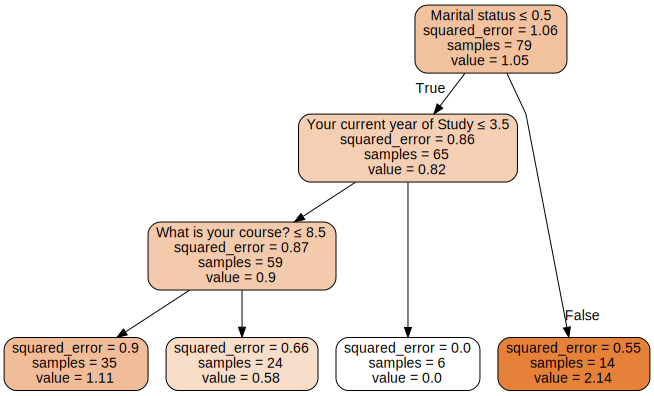

In [ ]:
# draw tree
draw_tree(m, xs, size=10, leaves_parallel=True, precision=2)

0. The top node represents the initial model before any splits have been done, when all the data is in one group. This is the simplest possible model. It is the result of asking zero questions and will always predict the value to be the average value of the whole dataset.

1. The next row shows us that in the case that the question of depression is true, or false, the next question to ask should be about anxiety.

2. Finally, we see that the predictors work correctly, and scores of mental health are directly related to these truth of falsehood of the main questions.

> Future work: then ask, what are good predictors for each of these questions?

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


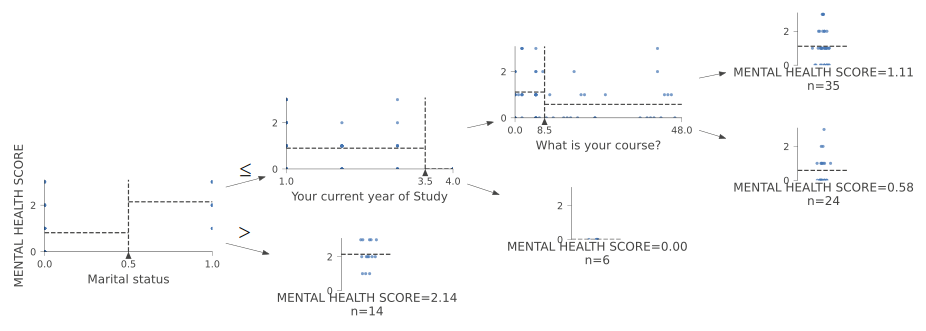

In [ ]:
samp_idx = np.random.permutation(len(y))[:250]
dtreeviz(m, xs.iloc[samp_idx], y.iloc[samp_idx], xs.columns, dep_var,
        fontname='DejaVu Sans', scale=1.6, label_fontsize=10,
        orientation='LR')

In [ ]:
# build larger regressor
m = DecisionTreeRegressor()
m.fit(xs, y);

In [ ]:
# check root mean squared
def r_mse(pred,y): return round(math.sqrt(((pred-y)**2).mean()), 6)
def m_rmse(m, xs, y): return r_mse(m.predict(xs), y)

In [ ]:
# perfect model?
m_rmse(m, xs, y)

0.0

In [ ]:
# pretty good?
m_rmse(m, valid_xs, valid_y)

0.92932

# Random Forests

1. Randomly choose a subset of the rows of your data (i.e., "bootstrap replicates of your learning set").
1. Train a model using this subset.
1. Save that model, and then return to step 1 a few times.
1. This will give you a number of trained models. To make a prediction, predict using all of the models, and then take the average of each of those model's predictions.

In [ ]:
# create random forest
# ne of the most important properties of random forests is that they aren't very sensitive to the hyperparameter choices, such as max_features
def rf(xs, y, n_estimators=20, max_samples=73,
       max_features=0.5, min_samples_leaf=5, **kwargs):
    return RandomForestRegressor(n_jobs=-1, n_estimators=n_estimators,
        max_samples=max_samples, max_features=max_features,
        min_samples_leaf=min_samples_leaf, oob_score=True).fit(xs, y)

In [ ]:
m = rf(xs, y);

In [ ]:
# To see the impact of n_estimators, let's get the predictions from each individual tree in our forest
preds = np.stack([t.predict(valid_xs.values) for t in m.estimators_])

In [ ]:
r_mse(preds.mean(0), valid_y)

0.718217

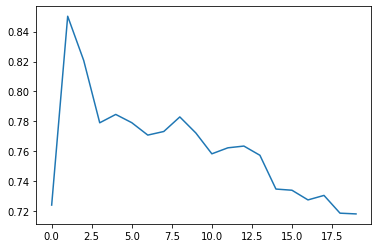

In [ ]:
plt.plot([r_mse(preds[:i+1].mean(0), valid_y) for i in range(20)]);

## error analysis


In [ ]:
# Recall that in a random forest, each tree is trained on a different subset of the training data. 
# The OOB error is a way of measuring prediction error on the training set by only including in the calculation of a row's error trees where that row was not included in training.
r_mse(m.oob_prediction_, y)

0.975054

## model interpretation

In [ ]:
# Tree Variance for Prediction Confidence
preds_std = preds.std(0)

In [ ]:
preds_std[:5]

array([0.44767039, 0.48810221, 0.44662167, 0.62603613, 0.4919508 ])

In [ ]:
# It's not normally enough just to know that a model can make accurate predictions—
# we also want to know how it's making predictions. 
# feature importance gives us insight into this.
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

In [ ]:
fi = rf_feat_importance(m, xs)
fi[:10]

,cols,imp
13,Marital status,0.386179
10,What is your course?,0.226502
20,TimestampElapsed,0.140485
9,Age,0.082721
11,Your current year of Study,0.076305
12,What is your CGPA?,0.038893
14,Did you seek any specialist for a treatment?,0.023436
8,Choose your gender,0.017439
16,TimestampWeek,0.005647
19,TimestampDayofyear,0.002393


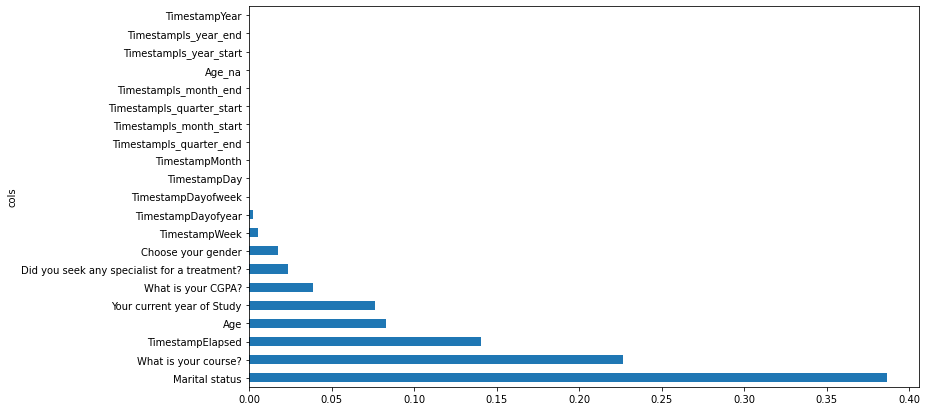

In [ ]:
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

plot_fi(fi[:30]);

In [ ]:
# remove low importance features
to_keep = fi[fi.imp>0.005].cols

In [ ]:
xs_imp = xs[to_keep]
valid_xs_imp = valid_xs[to_keep]

In [ ]:
m = rf(xs_imp, y)

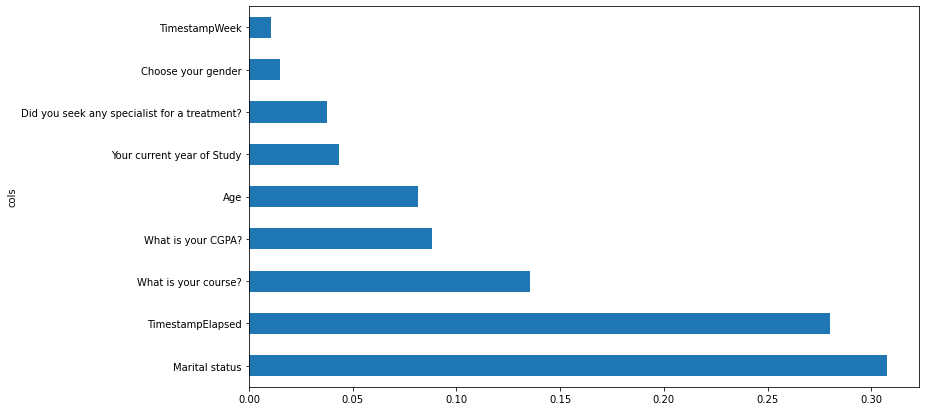

In [ ]:
plot_fi(rf_feat_importance(m, xs_imp));

In [ ]:
# remove redundant features: fields which might be so closely 
# correlated they are practically synonyms for each other
def get_oob(df):
    m = RandomForestRegressor(n_estimators=20, min_samples_leaf=15,
        max_samples=73, max_features=0.5, n_jobs=-1, oob_score=True)
    m.fit(df, y)
    return m.oob_score_

In [ ]:
to_drop = ['TimestampWeek', 'TimestampElapsed']
get_oob(xs_imp.drop(to_drop, axis=1))

-0.08724899475472347

In [ ]:
xs_final = xs_imp.drop(to_drop, axis=1)
valid_xs_final = valid_xs_imp.drop(to_drop, axis=1)

In [ ]:
save_pickle('xs_final.pkl', xs_final)
save_pickle('valid_xs_final.pkl', valid_xs_final)

In [ ]:
xs_final = load_pickle('xs_final.pkl')
valid_xs_final = load_pickle('valid_xs_final.pkl')

In [ ]:
m = rf(xs_final, y)
m_rmse(m, xs_final, y), m_rmse(m, valid_xs_final, valid_y)

(0.849868, 0.744532)

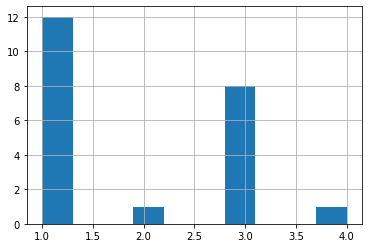

In [ ]:
# We'd like to understand the relationship between these predictors
ax = valid_xs_final['Your current year of Study'].hist()

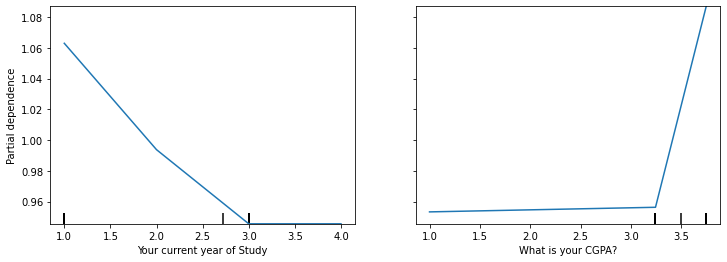

In [ ]:
# plot partial dependence
from sklearn.inspection import plot_partial_dependence

fig,ax = plt.subplots(figsize=(12, 4))
plot_partial_dependence(m, valid_xs_final, ['Your current year of Study','What is your CGPA?'],
                        grid_resolution=20, ax=ax);

In [ ]:
# tree interpreter: find out how much changing one variable
# effects the whole models accuracy
row = valid_xs_final.iloc[:5]

In [ ]:
prediction,bias,contributions = treeinterpreter.predict(m, row.values)

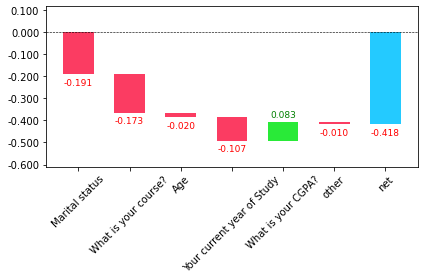

In [ ]:
waterfall(valid_xs_final.columns, contributions[0], threshold=0.08, 
          rotation_value=45,formatting='{:,.3f}');

# Neural Networks


- A problem with random forests, like all machine learning or deep learning algorithms, is that they don't always generalize well to new data. 

- So we use a nerual network to remedy this.

## Problems with previous models

In [ ]:
# extrapolate
np.random.seed(42)

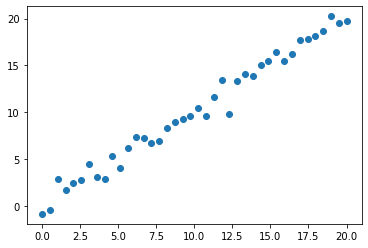

In [ ]:
x_lin = torch.linspace(0,20, steps=40)
y_lin = x_lin + torch.randn_like(x_lin)
plt.scatter(x_lin, y_lin);

In [ ]:
# make the 0-d value into a 1-d array
xs_lin = x_lin.unsqueeze(1)

In [ ]:
# create random forest
m_lin = RandomForestRegressor().fit(xs_lin[:30],y_lin[:30])

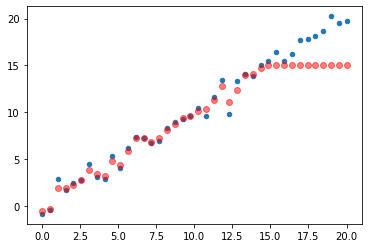

In [ ]:
# we see that the predictions are outside of the domain our training data covers
plt.scatter(x_lin, y_lin, 20)
plt.scatter(x_lin, m_lin.predict(xs_lin), color='red', alpha=0.5);

In [ ]:
# find out of domain data
df_dom = pd.concat([xs_final, valid_xs_final])
is_valid = np.array([0]*len(xs_final) + [1]*len(valid_xs_final))

m = rf(df_dom, is_valid)
rf_feat_importance(m, df_dom)[:6]

,cols,imp
1,What is your course?,0.608212
2,Age,0.144041
3,Your current year of Study,0.116597
4,What is your CGPA?,0.091258
0,Marital status,0.020237
6,Choose your gender,0.019656


In [ ]:
# get a baseline of the original random forest model's RMSE, 
# then see what the effect is of removing each of these columns in turn:
m = rf(xs_final, y)
print('orig', m_rmse(m, valid_xs_final, valid_y))

for c in ('Marital status','Choose your gender'):
    m = rf(xs_final.drop(c,axis=1), y)
    print(c, m_rmse(m, valid_xs_final.drop(c,axis=1), valid_y))

orig 0.712134
Marital status 0.756023
Choose your gender 0.732209


In [ ]:
# similar rmse: can drop column
time_vars = ['Marital status','Choose your gender']
xs_final_time = xs_final.drop(time_vars, axis=1)
valid_xs_time = valid_xs_final.drop(time_vars, axis=1)

m = rf(xs_final_time, y)
m_rmse(m, valid_xs_time, valid_y)

0.739693

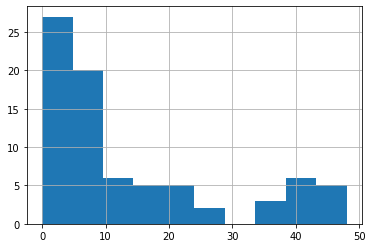

In [ ]:
xs['What is your course?'].hist();

In [ ]:
filt = xs['What is your course?']<11
xs_filt = xs_final_time[filt]
y_filt = y[filt]

In [ ]:
# less samples after drops
def rf(xs, y, n_estimators=20, max_samples=43,
       max_features=0.5, min_samples_leaf=5, **kwargs):
    return RandomForestRegressor(n_jobs=-1, n_estimators=n_estimators,
        max_samples=max_samples, max_features=max_features,
        min_samples_leaf=min_samples_leaf, oob_score=True).fit(xs, y)

In [ ]:
# train model
m = rf(xs_filt, y_filt)
m_rmse(m, xs_filt, y_filt), m_rmse(m, valid_xs_time, valid_y)

(0.899458, 0.801931)

## Solution using neural networks 

In [80]:
df_nn = pd.read_csv('student-mental-health/Student Mental health.csv', low_memory=False)
df_nn.columns

Index(['Timestamp', 'Choose your gender', 'Age', 'What is your course?',
       'Your current year of Study', 'What is your CGPA?', 'Marital status',
       'Do you have Depression?', 'Do you have Anxiety?',
       'Do you have Panic attack?',
       'Did you seek any specialist for a treatment?'],
      dtype='object')

In [81]:
genders = df_nn['Choose your gender'].unique()
df_nn['Choose your gender'] = df_nn['Choose your gender'].astype('category')
df_nn['Choose your gender'].cat.set_categories(genders, ordered=True, inplace=True)
df_nn.head(5)

,Timestamp,Choose your gender,Age,What is your course?,...,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,...,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,...,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,...,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,...,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,...,No,No,No,No


In [82]:
def categorical_embedding(data, category, embeddings):
  data[category] = data[category].astype('category')
  data[category].cat.set_categories(embeddings, ordered=True, inplace=True)

In [83]:
YesNo = df_nn['Did you seek any specialist for a treatment?'].unique()
categorical_embedding(df_nn, 'Did you seek any specialist for a treatment?', YesNo)
categorical_embedding(df_nn, 'Marital status', YesNo)

In [84]:
COURSE = df_nn['What is your course?'].unique()
categorical_embedding(df_nn, 'What is your course?', COURSE)

In [85]:
GPA = df_nn['What is your CGPA?'].unique()
categorical_embedding(df_nn, 'What is your CGPA?', GPA)

In [86]:
def add_cols(x, y, z):
  return 10 + x + y + z

In [87]:
dep_var = 'MENTAL HEALTH SCORE'
df_nn["Do you have Depression?"].replace({"Yes": 1, "No": 0}, inplace=True)
df_nn["Do you have Anxiety?"].replace({"Yes": 1, "No": 0}, inplace=True)
df_nn["Do you have Panic attack?"].replace({"Yes": 1, "No": 0}, inplace=True)
df_nn['MENTAL HEALTH SCORE'] = df_nn.apply(lambda x: add_cols(
    x['Do you have Depression?'], 
    x['Do you have Anxiety?'], 
    x['Do you have Panic attack?']), axis=1
)
df_nn[dep_var] = np.log(df_nn[dep_var])

In [88]:
df_nn = add_datepart(df_nn, 'Timestamp')
df_nn.head(5)

,Choose your gender,Age,What is your course?,Your current year of Study,...,TimestampIs_quarter_start,TimestampIs_year_end,TimestampIs_year_start,TimestampElapsed
0,Female,18.0,Engineering,year 1,...,False,False,False,1.596802e+09
1,Male,21.0,Islamic education,year 2,...,False,False,False,1.596802e+09
2,Male,19.0,BIT,Year 1,...,False,False,False,1.596802e+09
3,Female,22.0,Laws,year 3,...,False,False,False,1.596802e+09
4,Male,23.0,Mathemathics,year 4,...,False,False,False,1.596802e+09


In [112]:
cont_nn, cat_nn = cont_cat_split(df_nn, max_card=9000, dep_var=dep_var)

In [141]:
procs_nn = [Categorify, FillMissing, Normalize]

# pick a random number 50 < num < 60
rand = 50 + int(10 * random.random())
# seperate the data into training and validation data based on this
cond = (df_nn.TimestampElapsed<df_nn.TimestampElapsed[rand])
train_idx = np.where( cond)[0]
valid_idx = np.where(~cond)[0]
splits = (list(train_idx),list(valid_idx))

to_nn = TabularPandas(df_nn, procs_nn, cat_nn, cont_nn,
                      splits=splits, y_names=dep_var)

In [114]:
to_nn.classes['Choose your gender']
to_nn.classes['What is your course?']
to_nn.classes['What is your CGPA?']
to_nn.classes['Marital status']
to_nn.classes['Your current year of Study']
to_nn.classes['Did you seek any specialist for a treatment?']
save_pickle('to_nn.pkl',to_nn)

In [145]:
dls = to_nn.dataloaders()

In [146]:
learn = tabular_learner(dls, y_range=(8,12), layers=[200,100],
                        n_out=1, loss_func=F.mse_loss)

SuggestedLRs(valley=0.005248074419796467)

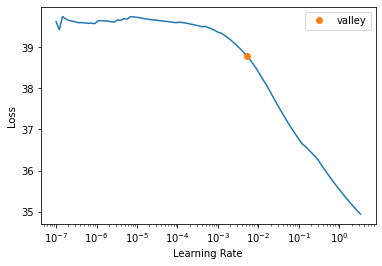

In [152]:
learn.lr_find()

In [155]:
learn.fit_one_cycle(7)

epoch,train_loss,valid_loss,time
0,38.417385,40.836716,00:00
1,38.395451,40.550056,00:00
2,38.928928,40.312004,00:00
3,38.721535,39.933910,00:00
4,38.556873,39.648403,00:00
5,38.428864,39.460346,00:00
6,38.330803,39.412674,00:00


In [156]:
learn.save('nn')

Path('models/nn.pth')